In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model   
import pandas as pd
import numpy as np

In [2]:
file = 'Test_data_2017.csv'
df = pd.read_csv(file)


# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Source: [Linear Regression](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

In [3]:
df.head()

,Country_name,year,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,2017,5.249,9.354,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,2017,6.039,10.067,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,2017,4.288,9.402,0.698,66.6,0.614,-0.147,0.865,0.625,0.437


In [4]:
df.count()

Country_name                         147
year                                 147
Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [5]:
clean_data = df.drop(columns=['Country_name', 'year'])

In [6]:
clean_data.count()

Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

#### Define Features, Target
#### Split Data into Training & Test
#### Fit the model

In [13]:
X = clean_data.drop(columns='Life_Ladder', axis=1)
y= clean_data['Life_Ladder']


In [14]:
X.shape

(147, 8)

In [15]:
y.shape

(147,)

(147,)

In [17]:
from sklearn.model_selection import train_test_split
from collections import Counter
#70% of data is for training the dataset, & 30% is for testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
Counter(y_train)

Counter({7.074: 1,
         5.098: 1,
         4.18: 1,
         3.929: 1,
         5.122: 1,
         4.311: 1,
         5.713: 1,
         4.331: 1,
         4.678: 1,
         6.23: 1,
         4.514: 1,
         4.441: 1,
         6.928: 1,
         3.933: 1,
         6.41: 1,
         4.853: 1,
         5.249: 1,
         7.327: 1,
         5.579: 1,
         4.001: 1,
         7.294: 1,
         7.287: 1,
         6.201: 1,
         4.808: 1,
         4.046: 1,
         6.273: 1,
         7.579: 1,
         5.481: 1,
         5.038: 1,
         4.683: 1,
         4.28: 1,
         4.616: 1,
         6.192: 1,
         5.553: 1,
         5.605: 1,
         6.79: 1,
         2.817: 1,
         5.938: 1,
         5.711: 1,
         3.638: 1,
         4.884: 1,
         4.559: 1,
         4.476: 1,
         4.31: 1,
         5.829: 1,
         7.459: 1,
         4.628: 1,
         4.361: 1,
         5.334: 1,
         5.175: 1,
         6.378: 1,
         5.911: 1,
         3.505: 1,

In [18]:
y=y.values.reshape(-1,1)

### Implement a linear model:

In [54]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
# Fitting our model with all our features in X
model = sm.OLS(y_train, X_train).fit()


X_train
#model.fit(X_train, y_train)

,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
45,10.878,0.892,71.9,0.841,0.145,0.414,0.737,0.196
56,9.300,0.796,61.9,0.865,0.488,0.900,0.863,0.319
39,7.612,0.734,58.0,0.717,0.001,0.757,0.609,0.304
36,9.307,0.638,61.4,0.593,-0.152,0.827,0.539,0.414
114,9.713,0.884,67.8,0.685,-0.077,0.851,0.510,0.326
...,...,...,...,...,...,...,...,...
133,10.238,0.876,66.4,0.644,-0.237,0.671,0.450,0.313
137,11.115,0.836,66.9,0.962,0.216,0.299,0.795,0.208
72,10.257,0.895,66.5,0.700,-0.154,0.798,0.623,0.232
140,9.968,0.914,68.9,0.898,-0.091,0.627,0.836,0.280


In [28]:
print(X.shape)

(147, 8)


In [29]:
print(y.shape)

(147, 1)


In [51]:
y_predict = model.predict(X_test)
print(y_predict)

99     5.114066
93     4.945948
54     6.810969
103    6.012703
98     4.746660
75     4.217913
89     4.688642
53     5.654156
44     5.098282
59     7.138466
5      6.968616
16     5.552323
91     5.591996
14     5.109925
58     4.590632
33     7.241959
73     5.015237
29     6.159950
66     5.868198
35     5.703070
117    5.827879
84     5.944537
31     5.953655
128    4.895088
109    5.517489
19     5.087123
51     5.606278
48     5.502177
120    5.658602
141    6.221583
125    7.123038
132    4.541513
42     4.861379
138    6.813897
28     3.999742
40     7.119239
105    5.376001
118    5.949822
17     5.521272
111    5.116037
78     7.045103
69     6.207223
74     4.503885
18     4.425451
4      4.828206
dtype: float64


In [52]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Life_Ladder   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1044.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                    2.89e-88
Time:                        18:24:12   Log-Likelihood:                         -88.963
No. Observations:                 102   AIC:                                      193.9
Df Residuals:                      94   BIC:                                      214.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

#### <ins>Interpretations of the results:
* R-squared value: This is a statistical measure of how well the regression line fits with the real data points. The higher the value, the better the fit
* Adj, R-squared: This is the corrected R-squared value according to the number of input features. Ideally, it should be close to the R-squareds value
* Coefficient: This gives the ‘M’ value for the regression line. It tells how much the Life_Ladder changes with a unit change in the feature columns. A positive value means that the two variables are directly proportional. A negative value means that the two variables are inversely proportional to each other
* Std error:  This tells us how accurate our coefficient value is. The lower the standard error, the higher the accuracy
* P >|t| : This is the p-value. It tells us how statistically significant feature values are to the Life_Ladder. A value less than 0.05 means that it is quite significant.








#### In the OLS model, we use the training data to fit and predict
#### In the Kinear Regression model, we are using training data to fit and test the data to predict

In [39]:


#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_test_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_test_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
# print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


Mean Absolute Error: 0.45117816213512835
Mean Square Error: 0.3702647275191162
Root Mean Square Error: 0.6084938188010756


#### Model equation $y_i = \beta_0 + \beta_1x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon $
#### $y_i = dependent variable $
#### $x_i = expanatory variables $
#### $\beta_0 = y-intercept $
#### $\beta_p = slope coefficient for each explanatory variable $
#### $\epsilon =  the models error term (also known as residuals $


##### Regression Equation: Happiness_Ladder = -3.22 +(0.28*Log_GDP_percapita)+(1.88*Social_support)+(0.04*Healthy _life_expectancy_at_birth)+ (1.02*Freedom_to_make_life_choices)+(0.52*Generosity)+(-0.59*Perceptions_of_corruption)+(1.47*Positive_affect)+(1.19*Negative_affect) + e

In [43]:
y_pred = model.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: 99     5.114066
93     4.945948
54     6.810969
103    6.012703
98     4.746660
75     4.217913
89     4.688642
53     5.654156
44     5.098282
59     7.138466
5      6.968616
16     5.552323
91     5.591996
14     5.109925
58     4.590632
33     7.241959
73     5.015237
29     6.159950
66     5.868198
35     5.703070
117    5.827879
84     5.944537
31     5.953655
128    4.895088
109    5.517489
19     5.087123
51     5.606278
48     5.502177
120    5.658602
141    6.221583
125    7.123038
132    4.541513
42     4.861379
138    6.813897
28     3.999742
40     7.119239
105    5.376001
118    5.949822
17     5.521272
111    5.116037
78     7.045103
69     6.207223
74     4.503885
18     4.425451
4      4.828206
dtype: float64


In [ ]:
results = pd.DataFrame( {"Actual value": y_test, "Predicted value": y_pred}).reset_index(drop=True)


In [ ]:
results.head(10)

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

In [ ]:
import statsmodels.api as sm  
print_model = sm.model
print(print_model)  

## Result interpretation:
#### <ins><b> R squared:</b></ins> Coefficient of determination: Shows how many points fall on the regression line. Here the value is 75.90%
#### <ins><b> Mean Absolute Error:</b></ins> Absolute difference between the actual and the predicted values, 0.44 is close to 0, which is good
#### <ins><b> Mean Square Error:</b></ins> descibes how close a regression line is to a set of points, by taking the distances from the point to the regression line and squaring them, 0.32 is close to 0, which indicates the model performance is good
 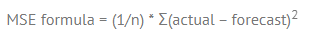
#### <ins><b> Root Mean Square Error:</b></ins> is an applied measure of the differences between numbers(population values and samples) which is predicted by an estimator. It describes the sample standard deviation of the differences between the predicted and observed values. 0.57 means that the model's performance is good

## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

In [ ]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.